# Figures for Harvey plankton study

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.dates import date2num
import numpy as np
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import os
from collections import OrderedDict
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
from scipy.optimize import curve_fit
import xarray as xr
import scs
import tabs
from matplotlib.colors import Normalize
import cmocean.tools

/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
# make directory to store processed data
if not os.path.exists('data'):
    os.makedirs('data')


In [3]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator(central_longitude=-85.0)


# SCS

## Read in

In [4]:
# Leg 1
base = '/Users/kthyng/Documents/data/2017-09_Harvey-Rapid-Response/Leg1/PS18_09_Leg1_DiMarco_SCS/'

sourcename = 'Sea-Bird-Thermosalinograph-(converted-ASCII-data)_20170922-223421.Raw'
savename = 'data/leg1_temp_salt.csv'
if not os.path.exists(savename):
    df1 = scs.read_file(base + sourcename)
    df1.to_csv(savename)  # save csv to save time
else:
    df1 = pd.read_csv(savename)

    
    
# Leg 3
base = '/Users/kthyng/Documents/data/2017-09_Harvey-Rapid-Response/Leg3/PS18_09_Leg3_Campbell_SCS/'

sourcename = 'Sea-Bird-Thermosalinograph-(converted-ASCII-data)_20170929-172721.Raw'
savename = 'data/leg3_temp_salt.csv'
if not os.path.exists(savename):
    df3 = scs.read_file(base + sourcename)
    df3.to_csv(savename)
else:
    df3 = pd.read_csv(savename)

## Plot

In [5]:
# points = np.array([x, y]).T.reshape(-1, 1, 2)
from matplotlib.collections import LineCollection


# buoys have full data range, so use to set up full color range
# colors = buoys[buoy][dstart:dend]['idx'].values  # buoys[buoy][dstart:dend].index
# norm.autoscale(colors)


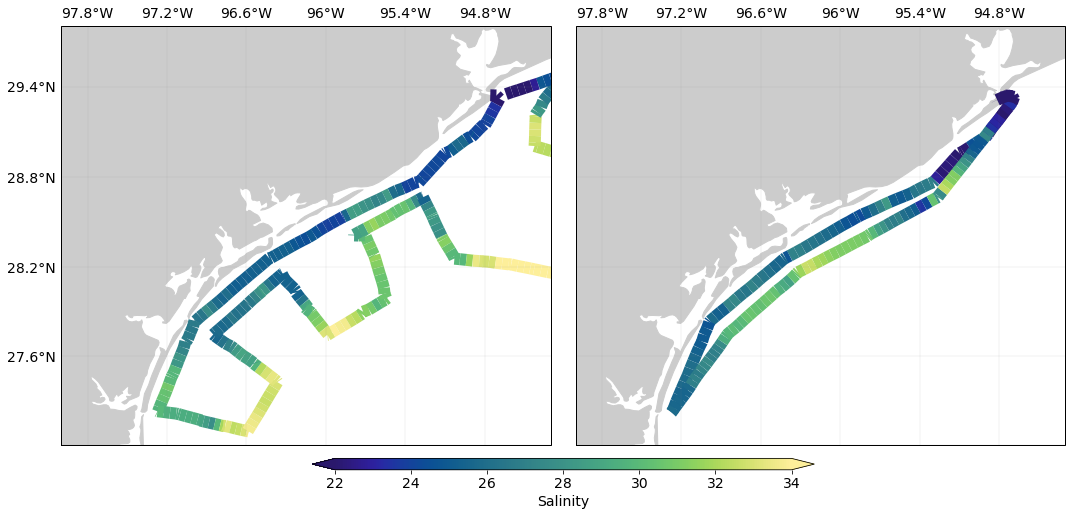

In [6]:
key = 'Practical salinity'
cmap = cmo.haline
label = 'Salinity'

# controlling min/max by hand because FGB data skews it and isn't in view
smin = 22  # min((df1[key].min(), df3[key].min()))
smax = 34  # max((df1[key].max(), df3[key].max()))

norm = Normalize(vmin=smin, vmax=smax)

fig = plt.figure(figsize=(18, 12))
fig.subplots_adjust(wspace=0.05)

# Leg 1

dc = 100
points = np.array([df1['lon'][::dc], df1['lat'][::dc]]).T.reshape(-1 ,1 ,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

ax1 = fig.add_subplot(1,2,1, projection=merc)
# ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax1.set_frame_on(False) # kind of like it without the box
ax1.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax1.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax1.add_feature(land_10m, facecolor='0.8')
ax1.set_facecolor('0.8')

# https://matplotlib.org/gallery/lines_bars_and_markers/multicolored_line.html
lc = LineCollection(segments, cmap=cmap, norm=norm, transform=pc)
# Set the values used for colormapping
lc.set_array(df1[key][::dc])
lc.set_linewidth(12)
mappable = ax1.add_collection(lc)


# Leg 3

dc = 100
points = np.array([df3['lon'][::dc], df3['lat'][::dc]]).T.reshape(-1 ,1 ,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

ax2 = fig.add_subplot(1,2,2, projection=merc)
# ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax2.set_frame_on(False) # kind of like it without the box
ax2.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax2.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
gl.ylabels_left = False
ax2.add_feature(land_10m, facecolor='0.8')
ax2.set_facecolor('0.8')

lc = LineCollection(segments, cmap=cmap, norm=norm, transform=pc)
# Set the values used for colormapping
lc.set_array(df3[key][::dc])
lc.set_linewidth(12)
mappable = ax2.add_collection(lc)


cb = fig.colorbar(mappable, ax=[ax1,ax2], orientation='horizontal', pad=0.02, shrink=0.5, aspect=40, extend='both')
cb.set_label(label)

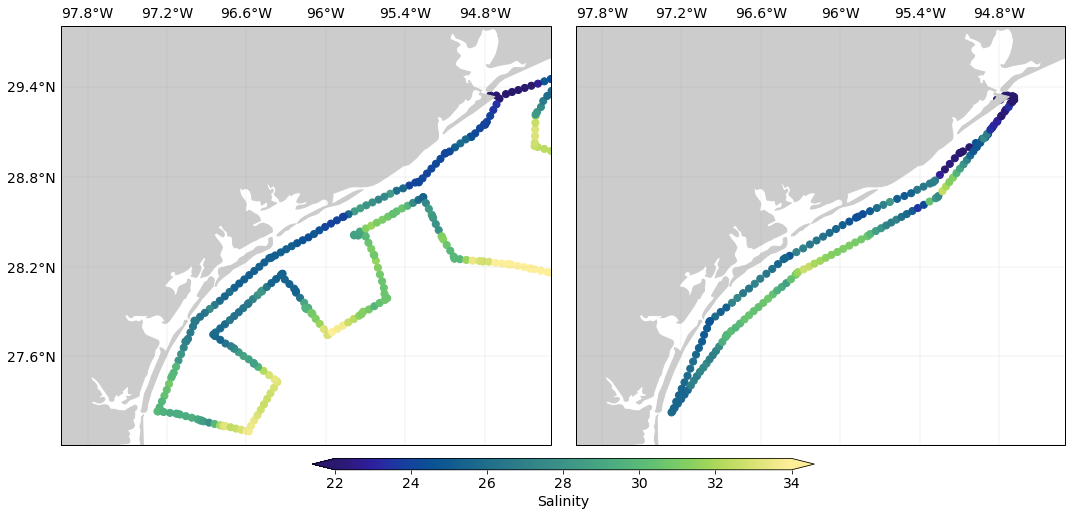

In [7]:
key = 'Practical salinity'
cmap = cmo.haline
label = 'Salinity'

# controlling min/max by hand because FGB data skews it and isn't in view
smin = 22  # min((df1[key].min(), df3[key].min()))
smax = 34  # max((df1[key].max(), df3[key].max()))

fig = plt.figure(figsize=(18, 12))
fig.subplots_adjust(wspace=0.05)

# Leg 1
ax1 = fig.add_subplot(1,2,1, projection=merc)
# ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax1.set_frame_on(False) # kind of like it without the box
ax1.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax1.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax1.add_feature(land_10m, facecolor='0.8')
ax1.set_facecolor('0.8')

mappable = ax1.scatter(df1['lon'][::dc], df1['lat'][::dc], c=df1[key][::dc], s=50, cmap=cmap, transform=pc, vmin=smin, vmax=smax)

# Leg 3
ax2 = fig.add_subplot(1,2,2, projection=merc)
# ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax2.set_frame_on(False) # kind of like it without the box
ax2.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax2.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
gl.ylabels_left = False
ax2.add_feature(land_10m, facecolor='0.8')
ax2.set_facecolor('0.8')

mappable = ax2.scatter(df3['lon'][::dc], df3['lat'][::dc], c=df3[key][::dc], s=50, cmap=cmap, transform=pc, vmin=smin, vmax=smax)

cb = fig.colorbar(mappable, ax=[ax1,ax2], orientation='horizontal', pad=0.02, shrink=0.5, aspect=40, extend='both')
cb.set_label(label)

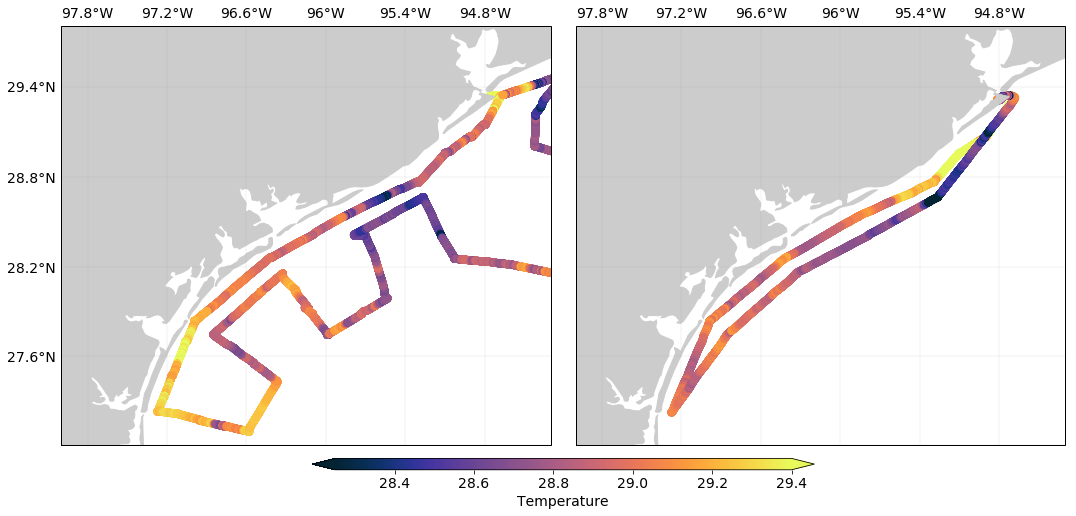

In [8]:
key = 'Temperature'
cmap = cmo.thermal
label = 'Temperature'

tmin = 28.25  # min((df1[key].min(), df3[key].min()))
tmax = 29.4  # max((df1[key].max(), df3[key].max()))

fig = plt.figure(figsize=(18, 12))
fig.subplots_adjust(wspace=0.05)

# Leg 1
ax1 = fig.add_subplot(1,2,1, projection=merc)
# ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax1.set_frame_on(False) # kind of like it without the box
ax1.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax1.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax1.add_feature(land_10m, facecolor='0.8')
ax1.set_facecolor('0.8')

mappable = ax1.scatter(df1['lon'], df1['lat'], c=df1[key], s=50, cmap=cmap, transform=pc, vmin=tmin, vmax=tmax)

# Leg 3
ax2 = fig.add_subplot(1,2,2, projection=merc)
# ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax2.set_frame_on(False) # kind of like it without the box
ax2.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax2.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
gl.ylabels_left = False
ax2.add_feature(land_10m, facecolor='0.8')
ax2.set_facecolor('0.8')

mappable = ax2.scatter(df3['lon'], df3['lat'], c=df3[key], s=50, cmap=cmap, transform=pc, vmin=tmin, vmax=tmax)

cb = fig.colorbar(mappable, ax=[ax1,ax2], orientation='horizontal', pad=0.02, shrink=0.5, aspect=40, extend='both')
cb.set_label(label)

# ADCP

## Read in

In [9]:
# Leg 1
loc = '/Users/kthyng/Documents/data_processed/adcp/ps1809l1/ps1809l1_postproc/wh300.unrotated.phasepos.amp/contour/wh300.nc'
adcp1 = xr.open_dataset(loc)

# Leg 3
loc = '/Users/kthyng/Documents/data_processed/adcp/ps1809l3/ps1809l3_postproc/wh300.unrotated.phasepos.phaseshift/contour/wh300.nc'
adcp3 = xr.open_dataset(loc)

## Plot

In [10]:
# A little data processing to smooth and standardize arrow length

lon1, lat1 = adcp1.lon.data, adcp1.lat.data
# dt is about 2 minutes, so 30 is about an hour of rolling mean
u1 = adcp1.u.isel(depth_cell=0).rolling(time=20, center=True).mean().data
v1 = adcp1.v.isel(depth_cell=0).rolling(time=20, center=True).mean().data
s1 = np.sqrt(u1**2 + v1**2)

lon3, lat3 = adcp3.lon.data, adcp3.lat.data
u3 = adcp3.u.isel(depth_cell=0).rolling(time=20, center=True).mean().data
v3 = adcp3.v.isel(depth_cell=0).rolling(time=20, center=True).mean().data
s3 = np.sqrt(u3**2 + v3**2)

# smax = max((np.nanmax(s1), np.nanmax(s3))) 

# # normalize arrows by smax, and account for this stretching in the quiver key
# u1 = u1/s1; v1 = v1/s1
# u3 = u3/s3; v3 = v3/s3

/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1744: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1744: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


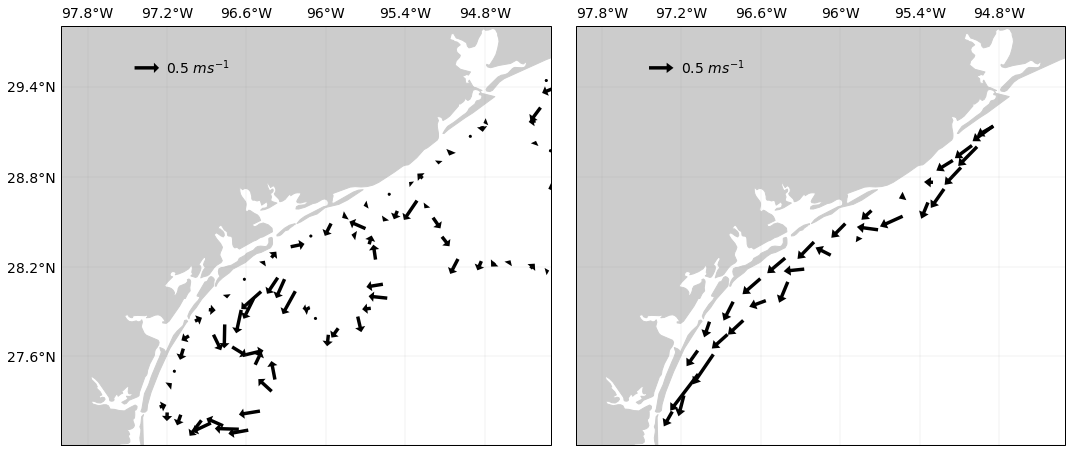

In [11]:

fig = plt.figure(figsize=(18, 12))
fig.subplots_adjust(wspace=0.05)

## Leg 1 ##

ax1 = fig.add_subplot(1,2,1, projection=merc)
ax1.set_frame_on(False) # kind of like it without the box
ax1.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax1.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax1.add_feature(land_10m, facecolor='0.8')
ax1.set_facecolor('0.8')

dd = 30
Q = ax1.quiver(lon1[::dd], lat1[::dd], u1[::dd], v1[::dd], transform=pc, width=0.007, scale=10, headlength=1.5, headaxislength=1.5)
qk = ax1.quiverkey(Q, 0.2, 0.9, 0.5, '0.5 $ms^{-1}$', labelpos='E', coordinates='axes')


## Leg 3 ##

ax2 = fig.add_subplot(1,2,2, projection=merc)
# ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax2.set_frame_on(False) # kind of like it without the box
ax2.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax2.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
gl.ylabels_left = False
ax2.add_feature(land_10m, facecolor='0.8')
ax2.set_facecolor('0.8')

dd = 40
Q = ax2.quiver(lon3[::dd], lat3[::dd], u3[::dd], v3[::dd], transform=pc, width=0.007, scale=10, headlength=2, headaxislength=2)
qk = ax2.quiverkey(Q, 0.2, 0.9, 0.5, '0.5 $ms^{-1}$', labelpos='E', coordinates='axes')


# Buoys

## Read in

In [12]:
buoys = {}
buoynames = ['B', 'D', 'W']

for buoy in buoynames:

    savename = 'data/' + buoy + '.csv'
    if not os.path.exists(savename):
        tabsnew = tabs.read(buoy, '2017-9-20', '2017-10-2 00:00')
        tabsnew.to_csv(savename)  # save csv to save time
    else:
        tabsnew = pd.read_csv(savename, parse_dates=True, index_col=0)
    tabsnew['idx'] = date2num(pd.to_datetime(tabsnew.index).to_pydatetime())

    buoys[buoy] = tabsnew

# Remove weird 0's in buoy B salinity and temp
ind = buoys['B']['Salinity'] == 0
buoys['B']['Salinity'][ind] = np.nan
ind = buoys['B']['WaterT [deg C]'] == 0
buoys['B']['WaterT [deg C]'][ind] = np.nan

## Plot

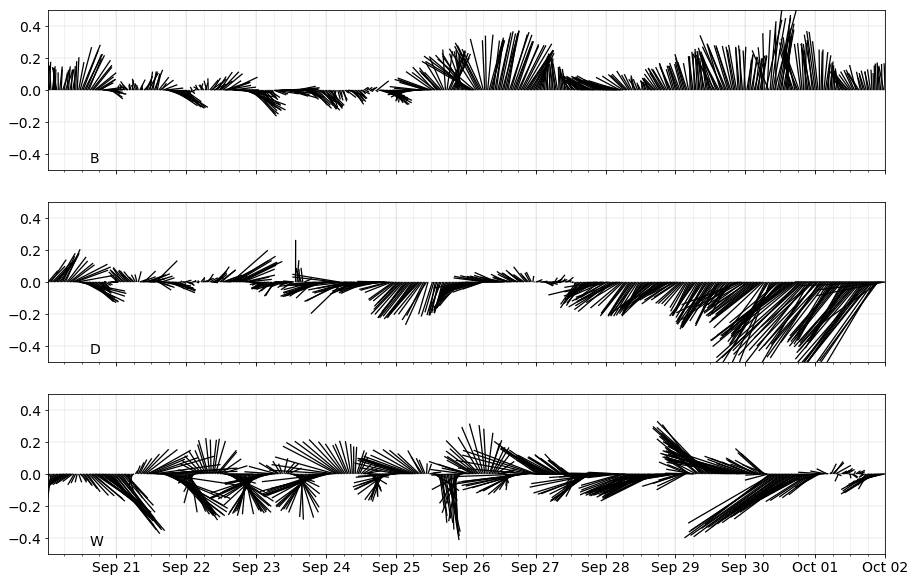

In [13]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10))
dd = 1
for buoy, ax in zip(buoynames, axes):
    ax.quiver(buoys[buoy]['idx'][::dd], np.zeros(len(buoys[buoy][::dd])), buoys[buoy]['East [cm/s]'][::dd]/100, buoys[buoy]['North [cm/s]'][::dd]/100,
              headaxislength=0, headlength=0, width=0.008, units='y', scale_units='y', scale=1)
    ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
    ax.grid(which='minor', lw=1, color='k', alpha=0.05)
    ax.text(0.05, 0.05, buoy, fontsize=14, transform=ax.transAxes)

ax.set_xlim(buoys[buoy]['idx'].min(), buoys[buoy]['idx'].max())
ax.set_ylim(-0.5, 0.5)

minor = mpl.dates.HourLocator(byhour=np.arange(0,24,6))
ax.xaxis.set_minor_locator(minor)
major = mpl.dates.HourLocator(byhour=np.arange(0,24,24))
ax.xaxis.set_major_locator(major)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %d'))


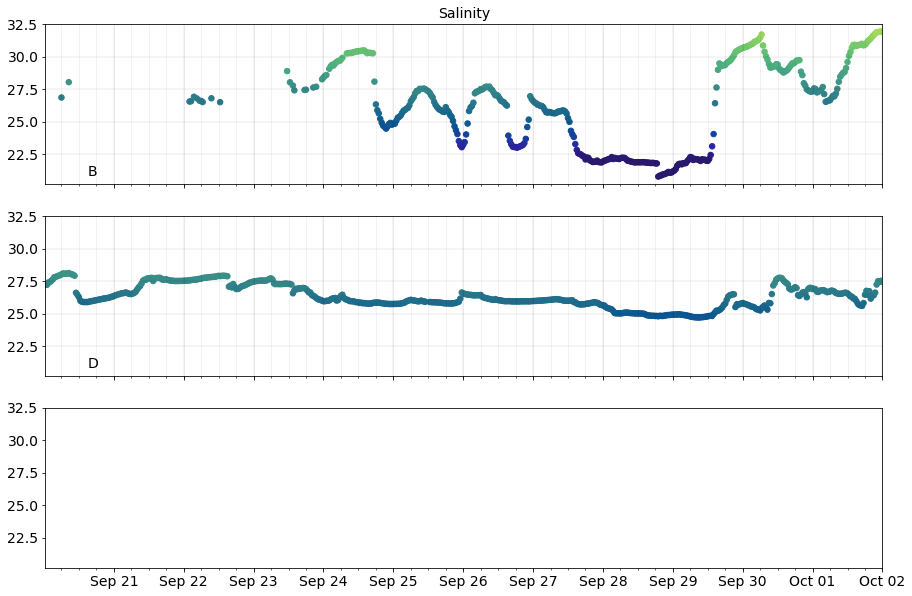

In [14]:
key = 'Salinity'
cmap = cmo.haline
label = 'Salinity'
vmin, vmax = smin, smax

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10))
dd = 1
norm = Normalize(vmin=smin, vmax=smax)
dc = 1
for buoy, ax in zip(buoynames, axes):
    if key in buoys[buoy].columns:
        ax.scatter(buoys[buoy]['idx'][::dc], buoys[buoy][key][::dc], c=buoys[buoy][key][::dc], s=30, cmap=cmap, vmin=vmin, vmax=vmax)
    #     dc = 2
    #     points = np.array([buoys[buoy]['idx'][::dc], buoys[buoy]['Salinity'][::dc]]).T.reshape(-1 ,1 ,2)
    #     segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # #     ax.plot(points[:,0,:])
    #     lc = LineCollection(segments, cmap=cmap, norm=norm)
    #     # Set the values used for colormapping
    #     lc.set_array(buoys[buoy]['Salinity'][::dc])
    #     lc.set_linewidth(3)
    #     ax.add_collection(lc)

    #         ax.plot(buoys[buoy][dstart:dend]['idx'], buoys[buoy][dstart:dend]['Salinity'])
        ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
        ax.grid(which='minor', lw=1, color='k', alpha=0.05)
        ax.text(0.05, 0.05, buoy, fontsize=14, transform=ax.transAxes)

ax.set_xlim(buoys[buoy]['idx'].min(), buoys[buoy]['idx'].max())
# ax.set_ylim(smin, smax)
axes[0].set_title(label, fontsize=14)

minor = mpl.dates.HourLocator(byhour=np.arange(0,24,6))
ax.xaxis.set_minor_locator(minor)
major = mpl.dates.HourLocator(byhour=np.arange(0,24,24))
ax.xaxis.set_major_locator(major)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %d'))


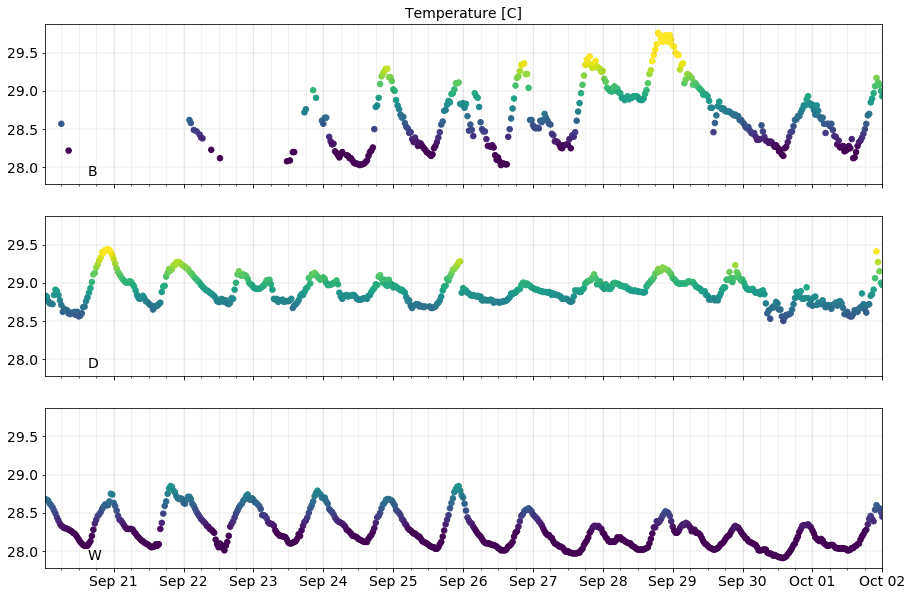

In [15]:
key = 'WaterT [deg C]'
cmap = cmo.thermal
label = 'Temperature [C]'
vmin, vmax = tmin, tmax

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10))
dd = 1
norm = Normalize(vmin=smin, vmax=smax)
dc = 1
for buoy, ax in zip(buoynames, axes):
    if key in buoys[buoy].columns:
        ax.scatter(buoys[buoy]['idx'][::dc], buoys[buoy][key][::dc], c=buoys[buoy][key][::dc], s=30, vmin=tmin, vmax=tmax)
    #     dc = 2
    #     points = np.array([buoys[buoy]['idx'][::dc], buoys[buoy]['Salinity'][::dc]]).T.reshape(-1 ,1 ,2)
    #     segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # #     ax.plot(points[:,0,:])
    #     lc = LineCollection(segments, cmap=cmap, norm=norm)
    #     # Set the values used for colormapping
    #     lc.set_array(buoys[buoy]['Salinity'][::dc])
    #     lc.set_linewidth(3)
    #     ax.add_collection(lc)

    #         ax.plot(buoys[buoy][dstart:dend]['idx'], buoys[buoy][dstart:dend]['Salinity'])
        ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
        ax.grid(which='minor', lw=1, color='k', alpha=0.05)
        ax.text(0.05, 0.05, buoy, fontsize=14, transform=ax.transAxes)

ax.set_xlim(buoys[buoy]['idx'].min(), buoys[buoy]['idx'].max())
# ax.set_ylim(smin, smax)
axes[0].set_title(label, fontsize=14)

minor = mpl.dates.HourLocator(byhour=np.arange(0,24,6))
ax.xaxis.set_minor_locator(minor)
major = mpl.dates.HourLocator(byhour=np.arange(0,24,24))
ax.xaxis.set_major_locator(major)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %d'))


# Combine data plots

* could write out date/times on the plot for each day or every few hours to show time passing
* could color arrows with temp/salinity value instead of coloring behind

/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1744: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1744: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


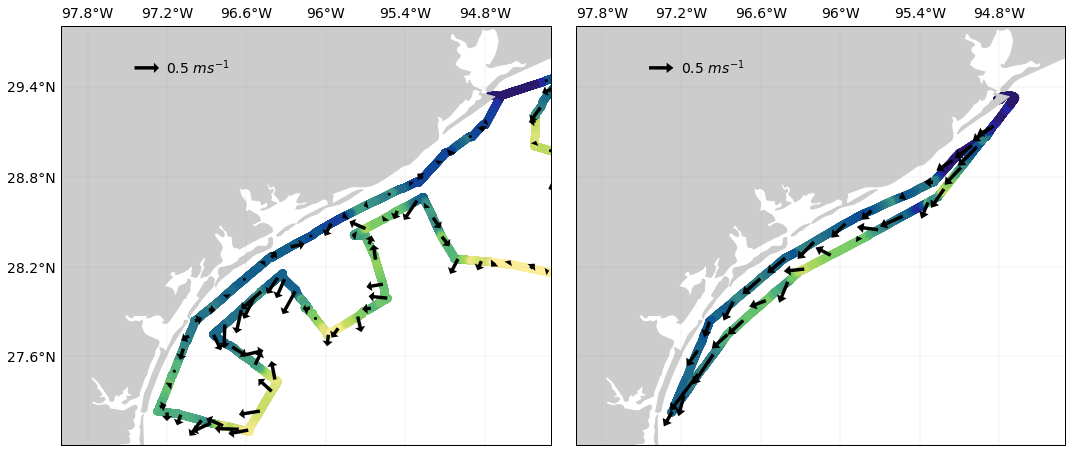

In [16]:
key = 'Practical salinity'
cmapscat = cmo.haline
label = 'Salinity'

vmin = min((df1[key].min(), df3[key].min()))
vmax = max((df1[key].max(), df3[key].max()))

# dc controls how light the light end of the gray scale is, out of 256
dc = 40
rgb = cmocean.tools.print_colormaps([cmo.gray_r])[0][dc:]
cmap = cmocean.tools.cmap(rgb, N=1000)

dstart = '2017-9-22 00:00'; dend = '2017-10-2 00:00'

# buoys have full data range, so use to set up full color range
colors = buoys[buoy][dstart:dend]['idx'].values  # buoys[buoy][dstart:dend].index
norm = Normalize()
norm.autoscale(colors)



lon, lat = adcp1.lon.data, adcp1.lat.data#, adcp1.u.isel(depth_cell=0).data, adcp1.v.isel(depth_cell=0).data
# dt is about 2 minutes, so 30 is about an hour of rolling mean
u = adcp1.u.sel(time=slice(dstart, dend)).isel(depth_cell=0).rolling(time=30, center=True).mean().data
v = adcp1.v.sel(time=slice(dstart, dend)).isel(depth_cell=0).rolling(time=30, center=True).mean().data

fig = plt.figure(figsize=(18,12)) #12, 10))
fig.subplots_adjust(wspace=0.05)

# Leg 1
ax1 = fig.add_subplot(1,2,1, projection=merc)
# ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax1.set_frame_on(False) # kind of like it without the box
ax1.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax1.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax1.add_feature(land_10m, facecolor='0.8')
ax1.set_facecolor('0.8')

mappable = ax1.scatter(df1['lon'], df1['lat'], c=df1[key], s=50, cmap=cmapscat, transform=pc, vmin=smin, vmax=smax)


# Color arrows by time
colors_adcp = date2num(adcp1.time.sel(time=slice(dstart, dend)).to_index().to_pydatetime())
# dd = 12
# q = ax1.quiver(lon1[::dd], lat1[::dd], u1[::dd], v1[::dd], transform=pc, color=cmap(norm(colors_adcp)), scale=10)

dd = 30
Q = ax1.quiver(lon1[::dd], lat1[::dd], u1[::dd], v1[::dd], transform=pc, width=0.007, scale=10, headlength=1.5, headaxislength=1.5, color='k')#, color=cmap(norm(colors_adcp)), edgecolors='k')
qk = ax1.quiverkey(Q, 0.2, 0.9, 0.5, '0.5 $ms^{-1}$', labelpos='E', coordinates='axes')



# # add buoys
# llB = -94.89905, 28.9823
# ax1.plot(*llB, marker='s', color='0.3', transform=pc)

# colors_buoyB = buoys[buoy][dstart:dend]['idx'].values  # buoys[buoy][dstart:dend].index


# axB = fig.add_axes([0.3, 0.6, 0.4, 0.2])
# buoy = 'B'
# dd = 1
# axB.quiver(buoys[buoy][dstart:dend]['idx'][::dd], np.zeros(len(buoys[buoy][dstart:dend][::dd])), buoys[buoy][dstart:dend]['East [cm/s]'][::dd]/100, buoys[buoy][dstart:dend]['North [cm/s]'][::dd]/100,
#           headaxislength=0, headlength=0, width=0.008, units='y', scale_units='y', scale=1, color=cmap(norm(colors_buoyB)))
# axB.grid(which='major', lw=1.5, color='k', alpha=0.05)
# axB.grid(which='minor', lw=1, color='k', alpha=0.05)
# axB.text(0.05, 0.05, buoy, fontsize=14, transform=axB.transAxes)
# axB.set_ylim(-0.5, 0.5)





# Leg 3
ax2 = fig.add_subplot(1,2,2, projection=merc)
# ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax2.set_frame_on(False) # kind of like it without the box
ax2.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax2.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
gl.ylabels_left = False
ax2.add_feature(land_10m, facecolor='0.8')
ax2.set_facecolor('0.8')

mappable = ax2.scatter(df3['lon'], df3['lat'], c=df3[key], s=50, cmap=cmapscat, transform=pc, vmin=smin, vmax=smax, alpha=0.5)

# Color arrows by time
colors_adcp = date2num(adcp3.time.sel(time=slice(dstart, dend)).to_index().to_pydatetime())
# dd = 20
# q = ax2.quiver(lon3[::dd], lat3[::dd], u3[::dd], v3[::dd], transform=pc, color=cmap(norm(colors_adcp)), scale=10)

dd = 40
Q = ax2.quiver(lon3[::dd], lat3[::dd], u3[::dd], v3[::dd], transform=pc, width=0.007, scale=10, headlength=2, headaxislength=2, color='k')#cmap(norm(colors_adcp)))
qk = ax2.quiverkey(Q, 0.2, 0.9, 0.5, '0.5 $ms^{-1}$', labelpos='E', coordinates='axes')


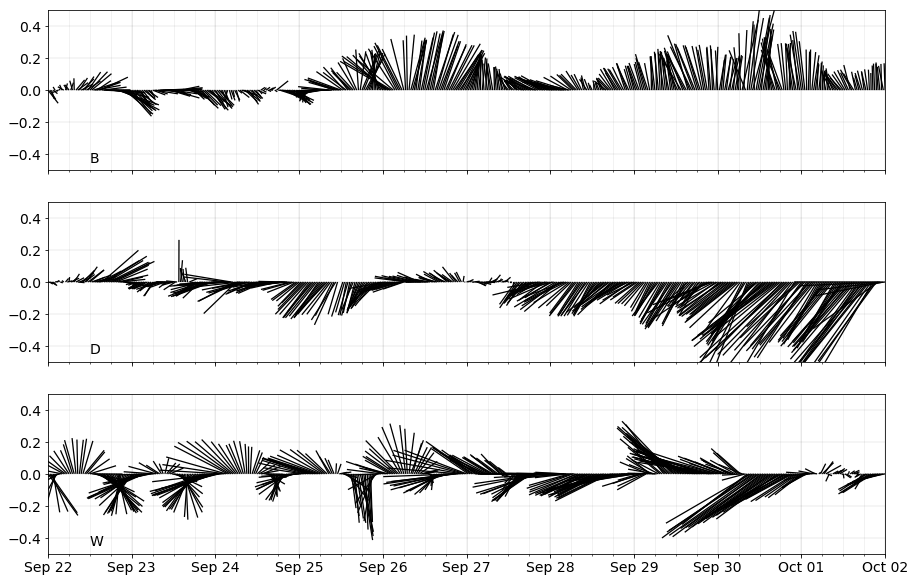

In [18]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10))
dd = 1
for buoy, ax in zip(buoynames, axes):
    
    colors = buoys[buoy][dstart:dend]['idx'].values 
    ax.quiver(buoys[buoy][dstart:dend]['idx'][::dd], np.zeros(len(buoys[buoy][dstart:dend][::dd])), buoys[buoy][dstart:dend]['East [cm/s]'][::dd]/100, buoys[buoy][dstart:dend]['North [cm/s]'][::dd]/100,
              headaxislength=0, headlength=0, width=0.008, units='y', scale_units='y', scale=1, color='k')#cmap(norm(colors_buoyB)))
    ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
    ax.grid(which='minor', lw=1, color='k', alpha=0.05)
    ax.text(0.05, 0.05, buoy, fontsize=14, transform=ax.transAxes)
    
ax.set_xlim(buoys[buoy].loc[dstart,'idx'], buoys[buoy].loc[dend,'idx'])
ax.set_ylim(-0.5, 0.5)

minor = mpl.dates.HourLocator(byhour=np.arange(0,24,6))
ax.xaxis.set_minor_locator(minor)
major = mpl.dates.HourLocator(byhour=np.arange(0,24,24))
ax.xaxis.set_major_locator(major)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %d'))
